In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [14]:
# 🔁 Carregando os datasets
train_path = Path("../data/SPECTF.train")
test_path = Path("../data/SPECTF.test")

df_train = pd.read_csv(train_path, header=None)
df_test = pd.read_csv(test_path, header=None)

# 🔗 Concatenando os dois conjuntos
df_full = pd.concat([df_train, df_test], ignore_index=True)

print(f"Shape final: {df_full.shape}")
df_full.head()

Shape final: (267, 45)


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


In [15]:
# Combinar os conjuntos de dados
df_full = pd.concat([df_train, df_test], ignore_index=True)

# Separar características e rótulos
X = df_full.iloc[:, 1:]
y = df_full.iloc[:, 0]

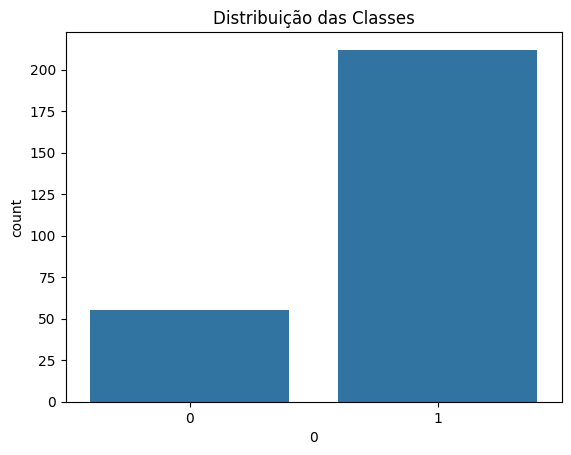

               1           2           3           4           5           6   \
count  267.000000  267.000000  267.000000  267.000000  267.000000  267.000000   
mean    66.183521   64.913858   68.677903   69.078652   64.801498   63.966292   
std      8.250315    9.444937    6.593543    8.394267    8.826328    9.479835   
min     23.000000   21.000000   38.000000   34.000000   21.000000   25.000000   
25%     62.000000   60.000000   65.000000   66.000000   61.000000   60.000000   
50%     67.000000   66.000000   69.000000   71.000000   66.000000   66.000000   
75%     71.500000   71.000000   73.000000   74.000000   70.000000   70.000000   
max     83.000000   81.000000   82.000000   84.000000   82.000000   89.000000   

               7           8           9           10  ...          35  \
count  267.000000  267.000000  267.000000  267.000000  ...  267.000000   
mean    70.168539   69.389513   63.295880   62.232210  ...   63.906367   
std      8.355678    9.497030    9.020783    9.3

In [16]:
# Verificar a distribuição das classes
sns.countplot(x=y)
plt.title('Distribuição das Classes')
plt.show()

# Verificar estatísticas descritivas
print(X.describe())

Distribuição após SMOTE: Counter({1: 212, 0: 212})


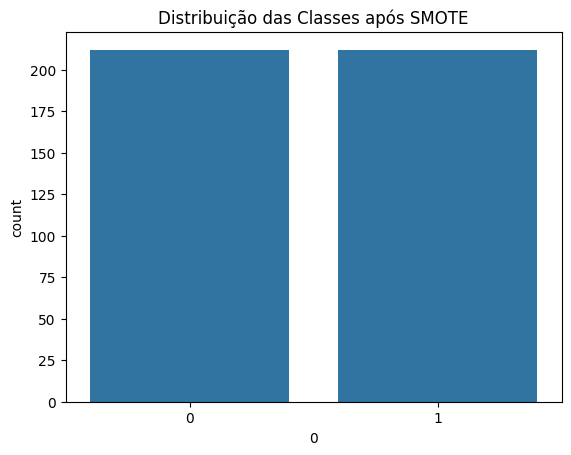

In [17]:
# Balanceamento das classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checa a nova contagem das classes
print("Distribuição após SMOTE:", Counter(y_resampled))

# Ou em DataFrame + gráfico
sns.countplot(x=pd.Series(y_resampled))
plt.title("Distribuição das Classes após SMOTE")
plt.show()

In [18]:
# Primeiro: separa treino (80%) e temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2, random_state=42, stratify=y_resampled
)

# Depois: divide temp igualmente em validação (10%) e teste (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42, stratify=y_temp
)

In [19]:
from collections import Counter

print("Treino:", Counter(y_train))
print("Validação:", Counter(y_val))
print("Teste:", Counter(y_test))

Treino: Counter({1: 170, 0: 169})
Validação: Counter({1: 21, 0: 21})
Teste: Counter({0: 22, 1: 21})


In [20]:
# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Salvar os dados normalizados e balanceados
joblib.dump((X_train_scaled, y_train), "../data/train_balanced.pkl")
joblib.dump((X_val_scaled, y_val), "../data/val_balanced.pkl")
joblib.dump((X_test_scaled, y_test), "../data/test_balanced.pkl")

['../data/test_balanced.pkl']